# <center>$Model\:Evaluation$</center>
Evaluating a model is a core part of building an effective machine learning model.Evaluation metrics are used to measure the quality of a model.We build a model, get feedback from metrics, make improvements and continue until we achieve a desirable performance.

## $What\:we\:will\:cover?$
- Why use metrics?
- Binary Classification
- Popular Metrics
  - Threshold based metrics- Confusion Matrix,Accuracy,Precision,Recall(aka Sensitivity),Specificity,F-measure.
  - Ranking based metrics- ROC AUC,PRC AUC.
  - Probability based metrics-  log-loss,brier score.
- Class imbalance case
- How to choose?
- Multi class classification
- Feature Importance

### $Why\:use\:Metrics?$

The loss or the objective function might not always capture the desired performance we want and it is sometimes difficult to fix a quantitative target based on these values as they may not be very meaningful.This is were metrics come in to help us capture the goal of the model and to fix some target that we would wish to achieve.They help us quantify the gap between
- Required performance and baseline
- Required performance and the current performance
- and also to see how well the model improves with tuning (eg: 60% accuracy to 70% accuracy with a target of 85%)
     


### $Binary\:Classification$

In this setting, we have an input $X$ and an associated binary label $Y$.The ouput of our model would be $\hat{Y}=g(X)$, where $g(.)$ depends on our model.

There could be two possible models:
- Models which output the class directly (eg: K Nearest Neighbor,Decision Trees etc)
- Models which output a real valued score (eg: Logistic regression, Neural networks etc)

We would mainly focus on score based models.
Let's start with an example.

<center><img src=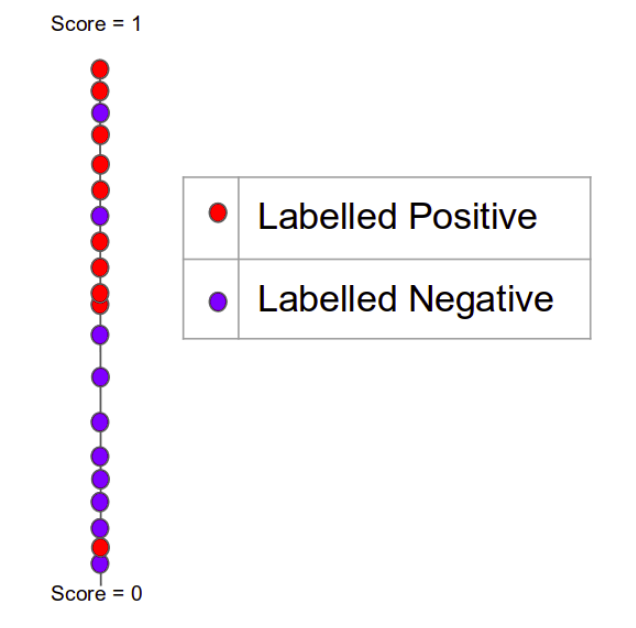></center>

From the above picture,we can see that the model(say logistic regression) has ranked each sample wrt a score between 0 and 1, in this case a probability measure, which denotes how much the model believes the sample belongs to the +ve class.The color as indicated represent the true label of the sample.

The first terminology that we would like to define is called the **prevalence** of the data we have in hand.It is defined as below.

<center>$Prevalence=\dfrac{\#Positives}{\#Positives+\#Negatives}$</center>
</br>
Note that prevalence is a property of the data and is independent of the model we choose.Prevalence gives an idea of how balanced the data is between the number of positive and negative classes.A skewed or biased dataset would either have very high or very low prevalence.Such a case would be a class imbalance scenario.

    
    


Now to turn the model into a classifier, we need to introduce a **threshold**,above which all samples will be classified as +ve and -ve for those below the threshold.

So,let's start with a natural choice of 0.5.

<center><img src=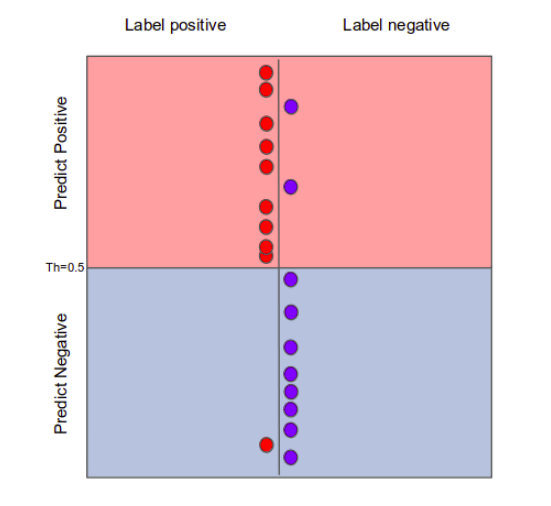></center>

In the above figure, points above the horizontal mid-line are those which the model has classified as +ve and those below are classified as -ve.Similarly,points to the left of the vertical mid-line have a ground truth as +ve and those to the right have ground truth as -ve.

Now we define the following  terms:
- **True Positive (TP)** - ground truth is +ve and also predicted +ve
- **False Positive (FP)**- ground truth is -ve but predicted as +ve
- **True Negative (TN)** - ground truth is -ve and also predicted -ve
- **False Negative (FN)**- ground truth is +ve but predicted -ve

## $Confusion\:Matrix$

<center><img src=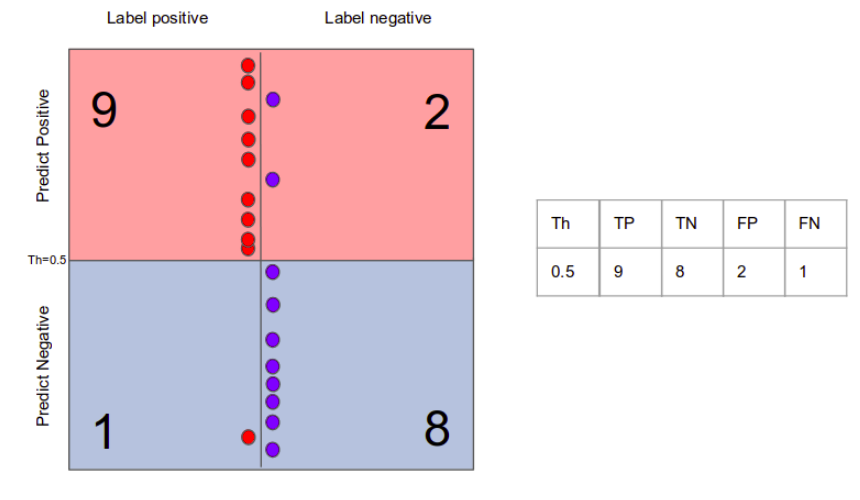></center>

The above representation is called the **confusion matrix**.The confusion matrix for $N$ number of classes is matrix of shape $N*N$.With this,we'll go ahead and define a few more terms.

- **Accuracy:**

<center>$Accuracy=\dfrac{\#Correct\:predictions}{\#samples}=\dfrac{TP+TN}{TP+TN+FN+FP}$</center>
</br>
Thus in general for a good performing model,we expect the diagonals of the confusion matrix to be high and off-diagonals to be less.

- **Precision: (aka Positive Predicitve Value or PPV)**

<center>$Precision=\dfrac{\#Predicted\:positive\:and\:labelled\:positive}{\#Predicted\:positive}=\dfrac{TP}{TP+FP}$</center>

- **True Positive Rate (TPR): (aka Recall,Sensitivity,Hit Rate)**

<center>$TPR=\dfrac{\#Predicted\:positive\:and\:labelled\:positive}{\#labelled\:positive}=\dfrac{TP}{TP+FN}$</center>

- **Specificity: (aka Negative Recall)**

<center>$Specificity=\dfrac{\#Predicted\:negative\:and\:labelled\:negative}{\#labelled\:negative}=\dfrac{TN}{TN+FP}$</center>

- **False Positive Rate (FPR):**

<center>$FPR=\dfrac{\#Predicted\:positive\:and\:labelled\:negative}{\#labelled\:negative}=\dfrac{FP}{TN+FP}=1-Specificity$</center>













Analysing the model wrt only one of the above metrics might not always give the desired performance.For example,if we choose a threshold such that every sample is predicted +ve and if we just look $recall$ alone, it would be $100\%$,which is useless,whereas $specificity$ would be $0$ and $precision$ would be very less.

Thus it is more meaningful to look at these metrics in conjuncture.The following metrics are derived from the above metrics.

- $\bf{F_1\:Score:}$

<center>$F_1\:Score=2\cdot \dfrac{Precision\cdot Recall}{Precision+Recall}$</center>
<br>
Clearly it takes into account both $precision$ and $recall$ and gives the same weightage to both.But in many cases we would want weigh one more than the other.In those cases,we use a more generalised measure as follows.

- $\bf{F_\beta\:Score:}$

<center>$F_\beta\:Score=(1+\beta^2)\cdot \dfrac{Precision\cdot Recall}{\beta^2\cdot Precision+Recall}$</center>
<br>
For $\beta>1$,$F_\beta$ weighs $recall$ more whereas for $\beta<1$,$F_\beta$ weighs $precision$ more.
<br>
<br>
Another metric which is used sometimes is the $G\:score$,which is defined as below.
<br>
<br>
<center>$G\:Score=\sqrt{Recall\cdot Specificity}$</center>






Thus the values of these metrics for the above example are:
<center><img src=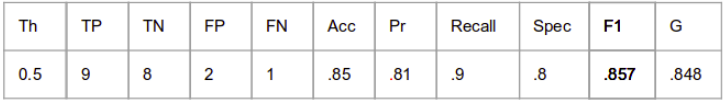></center>

The above values are only for a threshold of 0.5,for various other thresholds,the values are as below.
<center><img src=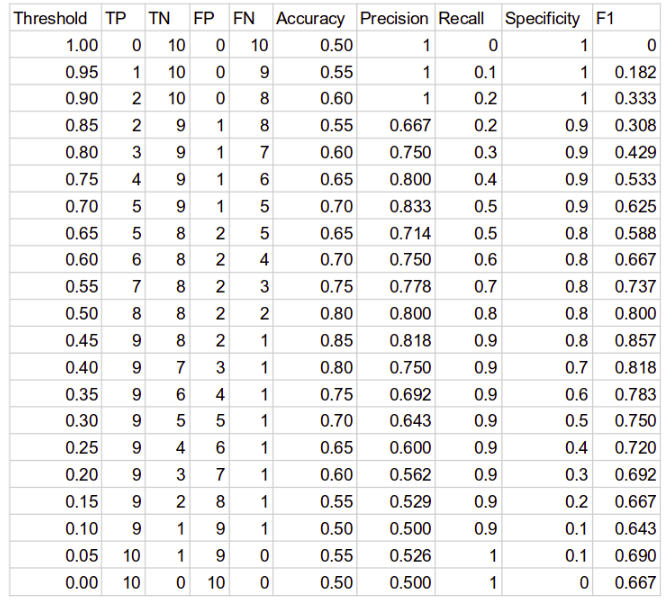></center>

Clearly from the above table we see some **trade-off** between **Precision-Recall** and **Recall-Specificity**.In order to capture this trade-off better,we introduce some more metrics.These metrics will help us evaluate the overall performance of the model better.
<br>

Until now,all the metrics we have seen are **threshold dependent**.The upcoming ones are independent of what the threshold is,rather depend directly on the **ranking** outputed by the model.

## $Receiver\:Operating\:Characteristic\:(ROC)$

The ROC is a plot between $recall$ and $specificity$ (or $1-specificity$).To plot it,$recall$ and $specificity$ are calulated for every threshold between two consecutive samples in the ranking list outputed by the model.

<center><img src=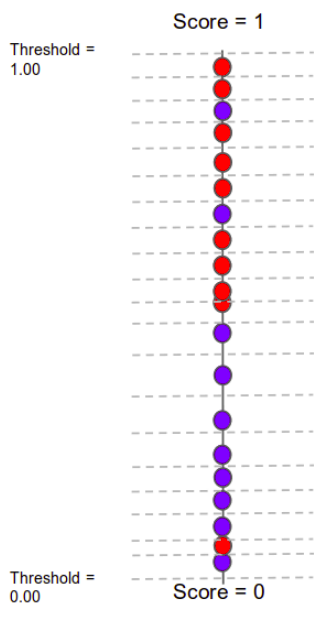></center>

The obtained ROC plot would look like the following.
<center><img src=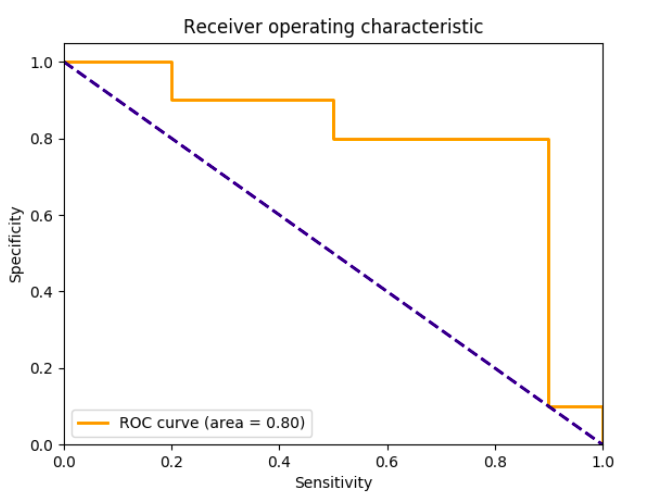></center>

Another way to interpret the ROC plot is,as we keep scanning the thresold from $1$,for every +ve sample we encounter,we move $\dfrac{1}{\#Positive\:samples}$ units to the right and for every -ve sample we encounter,we move $\dfrac{1}{\#Negative\:samples}$ units down.

<br>
The blue line is the baseline which indicates the plot of a model which randomly ranks the samples.So if the ROC of our model is below the baseline,it's performing worser than random guessing!!

An ideal model which ranks all the +ve samples above the -ve samples would have an ROC parallel to the axes and passing through $(1,0)$ and $(0,1)$.Thus the expanse covered by the ROC plot gives how good the model performs,which leads us to frame a new metric called $\bf Area\:Under\:the\:ROC\:(AU\:ROC)$.Thus better the $AU\:ROC$ better is the model.

## $Precision\:Recall\:Curve\:(PRC)$

In a similar setting as above and following the same lines,we make a plot between $precision$ and $recall$.Similar to $AU\:ROC$,$\bf AU\:PRC$ is also a useful metric.The plot is as shown below.

<center><img src=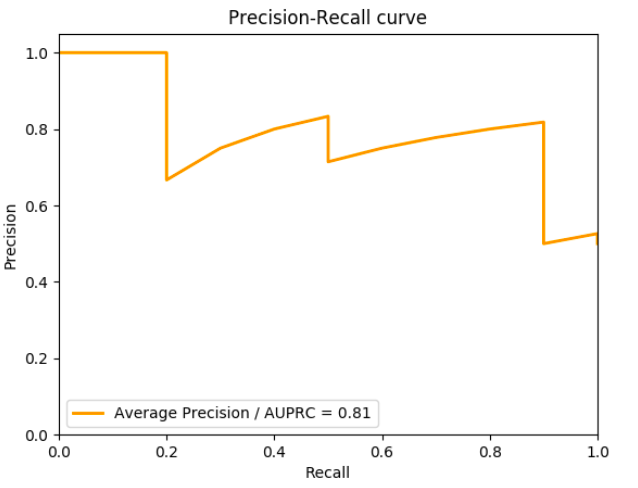></center>

Note that in a $PRC$,the $precision$ when $recall$ is $1$ is the $prevalence$ of the data.

One other metric of use which is derived from the $AU ROC$ is something called the $Gini\:Coefficient$.It is nothing but the ratio of the area enclosed between the $ROC$ plot and the baseline and the area of the triangle formed by the baseline with the axes.Simply put,

<center>$Gini\:Coefficient=2\cdot AUC-1$</center>
<br>

## $Log\:Loss$

<center><img src=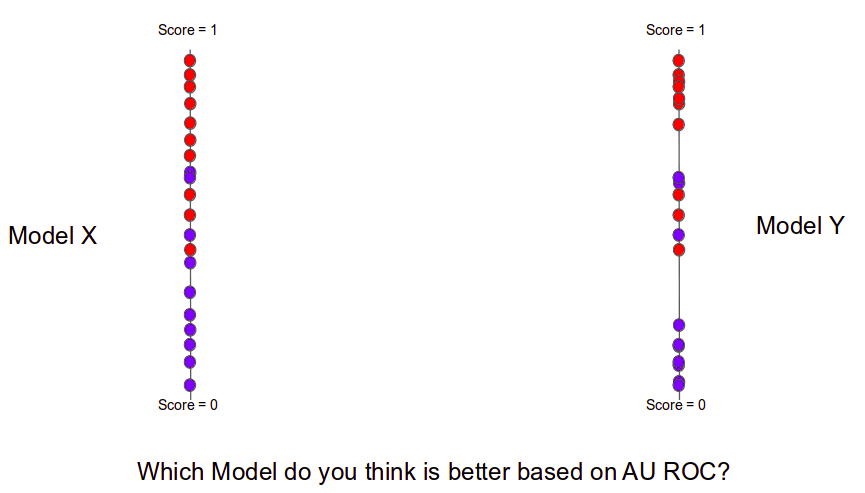></center>

Obviously,Model Y is a better model compared to Model X.But $AU\:ROC$ will conclude that both have the same performance since the value for the metric will end up being the same in both cases.It is simply because $AU\:ROC$ is a ranking based metric and thus only cares the relative order between samples and doesn't consider the actual score outputed by a model.
<br>
<br>
Now,in order to consider the score too,we need to introduce a new class of metrics which are score dependent and log-loss is one such metric.Mathematically log-loss is defined as below,

<center>$Log\:loss=-\dfrac{1}{N}\sum_{i=1}^{N}Y_i\cdot log(\hat{Y_i})+(1-Y_i)\cdot log(1-\hat{Y_i})$</center>
<br>
where $Y_i$ is the class label of the $i^{th}$ sample out of $N$ samples(i.e. either 0 or 1) and $\hat{Y_i}$ is the score between 0 and 1 outputed by the model.
It is easy to observe that log-loss acts light on confident right predicitons but strikes heavily on confident wrong predictions.Note that log-loss is also the commonly used loss function while training a model for classifications tasks.



Another score based metric which is commonly used is the $brier\:score$,which we will see next.

## $Brier\:Score\:(BS)$

The $brier\:score$ is simply the mean squared error between the predicited probabilities and the ground truth labels of the data.

<center>$BS=\dfrac{1}{N}\sum_{i=1}^{N}(\hat{Y_i}-Y_i)^2$</center>
<br>
To allow easier comparison with baselines(reference) another metric called the $brier\:skill\:score\:(BSS)$ is defined as below,
<br>
<br>
<center>$BSS=1-\dfrac{BS}{BS_{ref}}$</center>
<br>
A negative $BSS$ value suggests the model is performing worser than baseline,postive indicating a better performance than baseline.The $brier\:score$ is different from $log-loss$ in a way that it's more gentle with wrong predicitons.

## $Class\:Imbalance\:Scenarios$

Class imbalance occurs when the $prevalence$ of the data is either very high or low (eg. $<10\%$).In such a case,many of our metrics may fail and give a false hope of the model performing very well.For example,

- $Accuracy$ gets masked by the dominance of the majority class.So if we had 95 +ve labels and 5 -ve labels and if the model simply predicts all samples as the +ve class, we would have an $accuracy$ of $95\%$ which is misleading about the model's performance.
- In case of $log\:loss$,the majority class will easily dominate the loss,making us lose perspective of the model's performance on the minority class.
- $AU\:ROC$ also suffers a similar downfall as the majority class could easily dominate the area.
- $AU\:PRC$ is somewhat a more robust metric compared to the previous ones,as both $precision$ and $recall$ focus on the minority class (here +ve).Thus $AU\:PRC$ is preferred in such cases.
- The $F_1\:Score$ is also suitable in these cases as it also focuses on the +ve labels.$F_1\:Score$ is generally preferred over $AU\:PRC$ since the latter is sensitive to the ranking outputed by the model and thus the value could vary widely.

## $How\:to\:decide??$

Now that we have seen a bunch of popular metrics (there are many more too!),it might not be that obvious to know when to use what.So let's break it down!. 

<center><img src=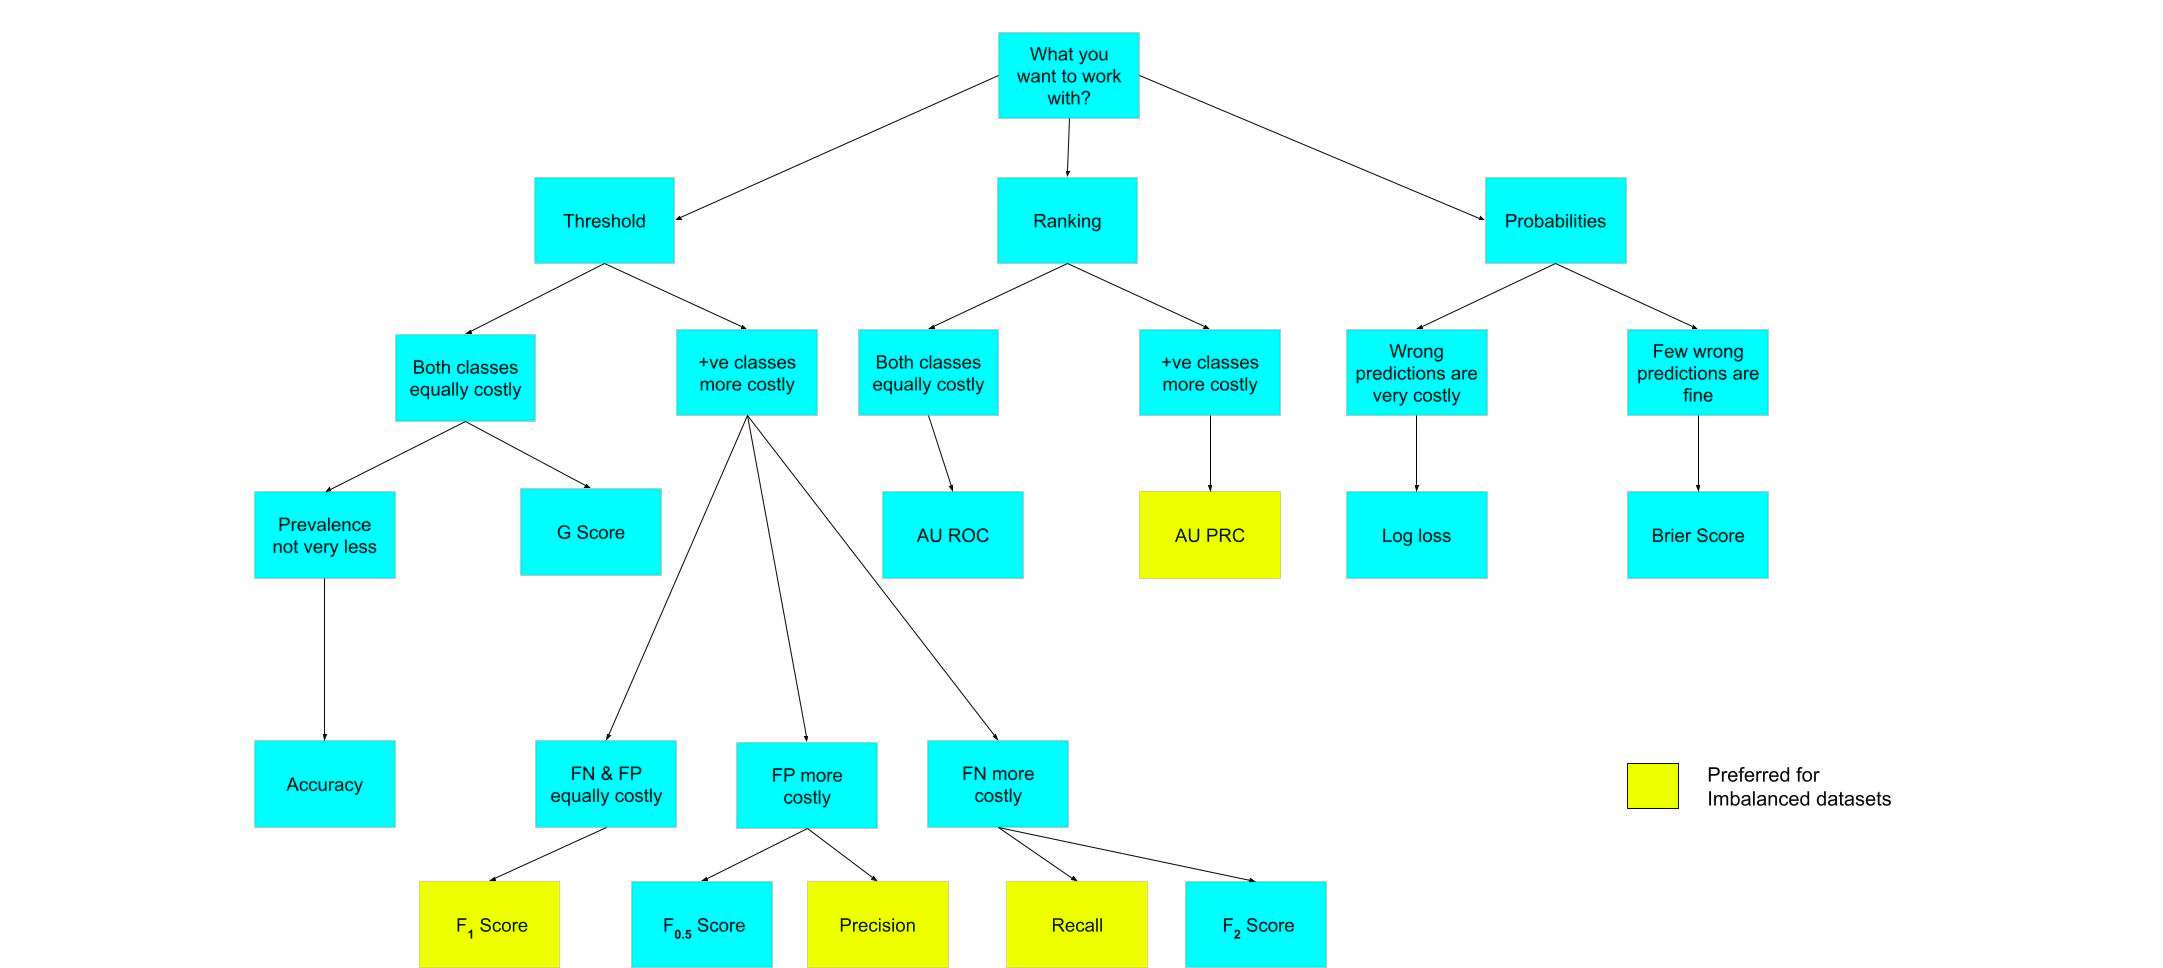></center>

<br>
The above chart pretty much summarizes all the metrics we have learnt till now.

### $Multi-Class\:Classification$

All metrics we have seen till now is in the setting of binary classification.We can extend their use to multi-label classification too.In the latter case,the $confusion\:matrix$ will be of dimension $N*N$,where $N$ is the number of classes.In order to evaluate all the metrics we have defined before, we consider a $One\:vs\:All$ scenario in which for each class,while calculating the metric,all the other classes together are considered as the -ve class.Thus we would end up getting $N$ values for each of these metrics.

## $Feature\:Importance$

Feature Importance refers to techniques that calculate a score for all the input features for a given model.The scores simply represent the importance of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

Feature importance helps us in understanding the data better,interpret and improve our model's performance.There are many techniques for feature importance, the simplest one is called permutation feature importance.The idea behind it is simple,the feature importance is calculated by noticing the increase or decrease in error when we permute the values of a feature. If permuting the values causes a huge change in the error, it means the feature is important for our model.

Let's walkthrough all the metrics through an example.

In [ ]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier  #any classification model will work
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.inspection import permutation_importance
from inspect import signature

In [ ]:
dataset = load_breast_cancer() # loading the dataset
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y1 = pd.Categorical.from_codes(dataset.target, dataset.target_names)
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y1))

In [ ]:
dataset.data.shape

(569, 30)

In [ ]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
y1

['malignant', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'malignant', 'malignant', 'benign']
Length: 569
Categories (2, object): ['malignant', 'benign']

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) #creating train test split

In [ ]:
rf = RandomForestClassifier() 
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
probs = rf.predict_proba(X_test)

In [ ]:
probs

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.84, 0.16],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.61, 0.39],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.59, 0.41],
       [0.44, 0.56],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.64, 0.36],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [0.35, 0.65],
       [0.92, 0.08],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.4 , 0.6 ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.98,

In [ ]:
malignant_probs = probs[:,1]
fpr, recall, thresholds = roc_curve(y_test, malignant_probs)
specificity=1-fpr
roc_auc = auc(recall, specificity)

In [ ]:
thresholds

array([2.  , 1.  , 0.98, 0.97, 0.93, 0.89, 0.81, 0.79, 0.65, 0.58, 0.51,
       0.39, 0.36, 0.27, 0.26, 0.21, 0.2 , 0.03, 0.02, 0.01, 0.  ])

In [ ]:
specificity

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.96703297, 0.96703297, 0.95604396, 0.92307692, 0.9010989 ,
       0.87912088, 0.85714286, 0.79120879, 0.72527473, 0.63736264,
       0.        ])

In [ ]:
recall

array([0.        , 0.51923077, 0.59615385, 0.61538462, 0.65384615,
       0.69230769, 0.73076923, 0.75      , 0.78846154, 0.88461538,
       0.88461538, 0.92307692, 0.94230769, 0.94230769, 0.94230769,
       0.94230769, 0.94230769, 0.94230769, 0.96153846, 0.96153846,
       1.        ])

In [ ]:
roc_auc

0.9671386306001691

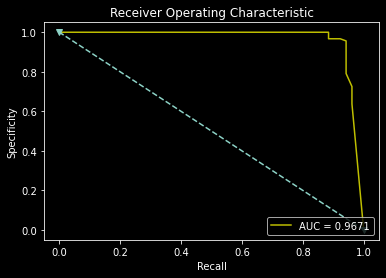

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(recall,specificity, 'y', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([1, 0], [0, 1],'v--')
plt.ylabel('Specificity')
plt.xlabel('Recall')
plt.show()

In [ ]:
y_pred = rf.predict(X_test)#predicitng the labels with threshold of 0.5

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
confusion_matrix(y_test,y_pred) #confusion matrix

array([[88,  3],
       [ 6, 46]])

In [ ]:
accuracy_score(y_test,y_pred) #accuracy

0.9370629370629371

In [ ]:
precision_score(y_test, y_pred) #precision

0.9387755102040817

In [ ]:
recall_score(y_test, y_pred) #recall

0.8846153846153846

In [ ]:
f1_score(y_test, y_pred) #f1 score

0.9108910891089108

In [ ]:
log_loss(y_test, y_pred ) #log loss

2.173785918506901

In [ ]:
brier_score_loss(y_test, y_pred) #brier score

0.06293706293706294

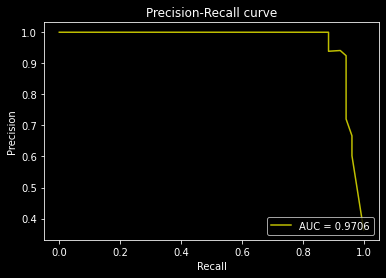

In [ ]:
precision, recall_p, threshold = precision_recall_curve(y_test, malignant_probs)
prc_auc=auc(recall_p,precision)
plt.plot(recall_p,precision, 'y', label = 'AUC = %0.4f' % prc_auc)
plt.legend(loc='lower right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

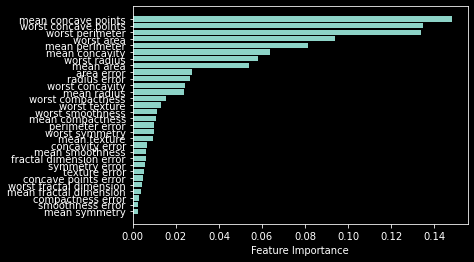

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(dataset.feature_names[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance") #calculating feature importance.
plt.show()